# 1. Setup and Library Imports

In [7]:
pip install xgboost lightgbm catboost

In [8]:
# Core libraries
import pandas as pd
import numpy as np
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Models and Classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifier, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct, WhiteKernel
from sklearn.kernel_ridge import KernelRidge
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# Model Selection and Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, learning_curve

# Model Evaluation and Scoring Methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, make_scorer, fbeta_score, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay, auc, average_precision_score
import shap

# Model Saving and Loading
import joblib

In [9]:
# General settings
pd.set_option('display.max_columns', None)
RANDOM_STATE = 42

# 2. Load Training and Test Data

In [4]:
# Load the training dataset from 'train.csv'
train_df = pd.read_csv('train.csv')
# Load the initial test dataset from 'test.csv'
temp_df = pd.read_csv('test.csv')

# Split the 'temp_df' into validation and final test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['target'])

# Separate features (X) and target (y) for the training dataset
X_train = train_df.drop(columns='target')
y_train = train_df['target']

# Separate features (X) and target (y) for the validation dataset
X_val = val_df.drop(columns='target')
y_val = val_df['target']

# Separate features (X) and target (y) for the final test dataset
X_test = test_df.drop(columns='target')
y_test = test_df['target']

# Print the dimensions (shape) of the resulting datasets to verify the split
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of X_val:", X_val.shape)
print("Dimensions of y_val:", y_val.shape)
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of y_test:", y_test.shape)

Dimensions of X_train: (5955, 41)
Dimensions of y_train: (5955,)
Dimensions of X_val: (441, 41)
Dimensions of y_val: (441,)
Dimensions of X_test: (441, 41)
Dimensions of y_test: (441,)


# 3. Baseline Model Selection and Training

In [ ]:
# Select an appropriate baseline model (Logistic Regression in this case)
baseline_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

# Train the baseline model using the training data
baseline_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the training data
y_pred_train = baseline_model.predict(X_train)
# Get probability estimates for the positive class (class 1)
y_pred_proba_train = baseline_model.predict_proba(X_train)[:, 1]

# Evaluate the baseline model on the training data
print("BASELINE MODEL EVALUATION ON TRAINING DATA")
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=1, zero_division=0)
recall_train = recall_score(y_train, y_pred_train, pos_label=1, zero_division=0)
f1_train = f1_score(y_train, y_pred_train, pos_label=1, zero_division=0)
f2_train = fbeta_score(y_train, y_pred_train, beta=2, pos_label=1, zero_division=0)

print(f"Recall (Positive Class): {recall_train:.4f}")
print(f"Precision (Positive Class): {precision_train:.4f}")
print(f"F1-score (Positive Class): {f1_train:.4f}")
print(f"F2-score (Positive Class): {f2_train:.4f}")
print(f"Accuracy: {accuracy_train:.4f}")

print("\nCLASSIFICATION REPORT FOR TRAINING DATA")
print(classification_report(y_train, y_pred_train, zero_division=0))

BASELINE MODEL EVALUATION ON TRAINING DATA
Recall (Positive Class): 0.7987
Precision (Positive Class): 0.8450
F1-score (Positive Class): 0.8212
F2-score (Positive Class): 0.8076
Accuracy: 0.8250

CLASSIFICATION REPORT FOR TRAINING DATA
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2959
           1       0.84      0.80      0.82      2996

    accuracy                           0.83      5955
   macro avg       0.83      0.83      0.82      5955
weighted avg       0.83      0.83      0.82      5955



In [ ]:
# Make predictions on the test data
y_pred_test = baseline_model.predict(X_test)
# Get probability estimates for the positive class (class 1)
y_pred_proba_test = baseline_model.predict_proba(X_test)[:, 1]

# Evaluate the baseline model on the test data
print("BASELINE MODEL EVALUATION ON TEST DATA")
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label=1, zero_division=0)
recall_test = recall_score(y_test, y_pred_test, pos_label=1, zero_division=0)
f1_test = f1_score(y_test, y_pred_test, pos_label=1, zero_division=0)
f2_test = fbeta_score(y_test, y_pred_test, beta=2, pos_label=1, zero_division=0)

print(f"Recall (Positive Class): {recall_test:.4f}")
print(f"Precision (Positive Class): {precision_test:.4f}")
print(f"F1-score (Positive Class): {f1_test:.4f}")
print(f"F2-score (Positive Class): {f2_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")

print("\nCLASSIFICATION REPORT FOR TEST DATA")
print(classification_report(y_test, y_pred_test, zero_division=0))

BASELINE MODEL EVALUATION ON TEST DATA
Recall (Positive Class): 0.5070
Precision (Positive Class): 0.4045
F1-score (Positive Class): 0.4500
F2-score (Positive Class): 0.4826
Accuracy: 0.8005

CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       370
           1       0.40      0.51      0.45        71

    accuracy                           0.80       441
   macro avg       0.65      0.68      0.66       441
weighted avg       0.82      0.80      0.81       441



# 4. Candidate Model Selection and Initial Training

### Linear Models

In [ ]:
# Define all model categories
linear_models = {
    # Linear Models
    "Logistic Regression (L1, C=0.1)": LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=RANDOM_STATE, max_iter=1000),
    "Logistic Regression (L2, C=1.0)": LogisticRegression(penalty='l2', C=1.0, random_state=RANDOM_STATE, max_iter=1000),
    "SGD Classifier (ElasticNet)": SGDClassifier(penalty='elasticnet', alpha=0.01, l1_ratio=0.15, loss='log_loss', random_state=RANDOM_STATE, max_iter=1000, tol=1e-3)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(linear_models.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    val_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_scores': cv_scores,
        'val_f2': val_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate sparsity (percentage of zero coefficients)
        n_features = len(model.coef_.flatten())
        non_zero_coefs = np.count_nonzero(model.coef_)
        sparsity = (1 - non_zero_coefs/n_features) * 100

        # Calculate CV Coefficient of Variation
        cv_coefficient_variation = model_data['cv_std'] / model_data['cv_mean'] if model_data['cv_mean'] > 0 else float('inf')

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['val_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Training Time': model_data['train_time'],
            'Sparsity (%)': sparsity,
            'CV Coefficient of Variation': cv_coefficient_variation,
            'Val_F2': model_data['val_f2']
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Training Time,Sparsity (%),CV Coefficient of Variation,Val_F2
0,SGD Classifier (ElasticNet),0.5708,0.7956,0.3247,0.0765,12.1951,0.0664,0.5708
1,"Logistic Regression (L2, C=1.0)",0.5333,0.7827,0.4396,0.5917,0.0000,0.1258,0.5333
2,"Logistic Regression (L1, C=0.1)",0.5305,0.7833,0.4301,0.6312,4.8780,0.1109,0.5305


### Kernel-Based Models

In [ ]:
# Define all kernel model categories
models_kernel = {
    "SVC (RBF Kernel)": SVC(kernel='rbf', C=1, random_state=RANDOM_STATE, probability=True),
    "SVC (Polynomial Kernel, degree=3)": SVC(kernel='poly', degree=3, C=1, random_state=RANDOM_STATE, probability=True),
    "Gaussian Process Classifier": GaussianProcessClassifier(random_state=RANDOM_STATE)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_kernel.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    val_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_scores': cv_scores,
        'val_f2': val_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate sparsity (for kernel models, use number of support vectors if available)
        sparsity = 0  # Default for models without sparsity concept
        if hasattr(model, 'n_support_'):
            # For SVM, use support vector ratio as "density" measure
            n_support_vectors = model.n_support_.sum()
            sparsity = (1 - n_support_vectors/len(X_train)) * 100

        # Calculate CV Coefficient of Variation
        cv_coefficient_variation = model_data['cv_std'] / model_data['cv_mean'] if model_data['cv_mean'] > 0 else float('inf')

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['val_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Training Time': model_data['train_time'],
            'Sparsity (%)': sparsity,
            'CV Coefficient of Variation': cv_coefficient_variation,
            'Val_F2': model_data['val_f2']  # Same as F2 Score for clarity
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Training Time,Sparsity (%),CV Coefficient of Variation,Val_F2
0,Gaussian Process Classifier,0.9889,0.9924,0.9467,69.6878,0.0000,0.0007,0.9889
1,"SVC (Polynomial Kernel, degree=3)",0.7618,0.9483,0.7143,5.7995,62.9051,0.0265,0.7618
2,SVC (RBF Kernel),0.6925,0.9194,0.6494,12.4752,56.7086,0.0378,0.6925


### Instance-Based Models

In [ ]:
# Define all model categories
models_instance = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "KNN (Distance Weighted)": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "KNN (Uniform Weighted)": KNeighborsClassifier(n_neighbors=5, weights='uniform')
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_instance.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    val_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_scores': cv_scores,
        'val_f2': val_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate CV Coefficient of Variation
        cv_coefficient_variation = model_data['cv_std'] / model_data['cv_mean'] if model_data['cv_mean'] > 0 else float('inf')

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['val_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Training Time': model_data['train_time'],
            'CV Coefficient of Variation': cv_coefficient_variation,
            'Val_F2': model_data['val_f2']  # Same as F2 Score for clarity
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Training Time,CV Coefficient of Variation,Val_F2
0,KNN (Distance Weighted),0.9367,0.9805,0.7474,0.0050,0.0027,0.9367
1,K-Nearest Neighbors,0.8014,0.9462,0.4465,0.0087,0.0047,0.8014
2,KNN (Uniform Weighted),0.8014,0.9462,0.4465,0.0049,0.0047,0.8014


### Tree-Based Models

In [ ]:
# Define all model categories
models_tree = {
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_STATE)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_tree.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    val_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_scores': cv_scores,
        'val_f2': val_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate CV Coefficient of Variation
        cv_coefficient_variation = model_data['cv_std'] / model_data['cv_mean'] if model_data['cv_mean'] > 0 else float('inf')

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['val_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Training Time': model_data['train_time'],
            'CV Coefficient of Variation': cv_coefficient_variation,
            'Val_F2': model_data['val_f2']  # Same as F2 Score for clarity
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Training Time,CV Coefficient of Variation,Val_F2
0,Random Forest,1.000,0.9852,1.0000,1.6636,0.0171,1.000
1,Extra Trees,1.000,0.9847,1.0000,0.6094,0.0241,1.000
2,Decision Tree,0.941,0.9457,0.9306,0.0949,0.0208,0.941


### Boosting Models

In [ ]:
# Define all boosting model categories
models_boosting = {
    "AdaBoost": AdaBoostClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=RANDOM_STATE)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_boosting.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    val_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_scores': cv_scores,
        'val_f2': val_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate CV Coefficient of Variation
        cv_coefficient_variation = model_data['cv_std'] / model_data['cv_mean'] if model_data['cv_mean'] > 0 else float('inf')

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['val_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Training Time': model_data['train_time'],
            'CV Coefficient of Variation': cv_coefficient_variation,
            'Val_F2': model_data['val_f2']  # Same as F2 Score for clarity
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Training Time,CV Coefficient of Variation,Val_F2
0,XGBoost,0.9887,0.9866,1.0000,0.3194,0.0229,0.9887
1,CatBoost,0.9887,0.9844,1.0000,11.0930,0.0266,0.9887
2,AdaBoost,0.5366,0.7947,0.3492,0.6181,0.0969,0.5366


### Neural Networks

In [ ]:
# Define all model categories
models_neural = {
    "Multi-layer Perceptron (MLP)": MLPClassifier(random_state=RANDOM_STATE, max_iter=1000),
    "Perceptron": Perceptron(random_state=RANDOM_STATE, max_iter=1000),
    "Stochastic Gradient Descent (Hinge Loss)": SGDClassifier(loss='hinge', random_state=RANDOM_STATE, max_iter=1000)
}

# F2 Score
f2_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)

results = {}
failed_models = []

for i, (model_name, model) in enumerate(models_neural.items(), 1):
    # Cross-Validation on Train Data
    start_time = time.time()
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring=f2_scorer, n_jobs=-1
    )
    cv_time = time.time() - start_time

    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train model and evaluate on Validation Set
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    inference_time = time.time() - start_time

    # Probability predictions (if available)
    y_val_pred_proba = None
    if hasattr(model, 'predict_proba'):
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_val_pred_proba = model.decision_function(X_val)

    # F2 Score on validation set
    val_f2 = fbeta_score(y_val, y_val_pred, beta=2, zero_division=0)

    # Store results
    results[model_name] = {
        'model': model,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_scores': cv_scores,
        'val_f2': val_f2,
        'y_val_pred': y_val_pred,
        'y_val_pred_proba': y_val_pred_proba,
        'cv_time': cv_time,
        'train_time': train_time,
        'inference_time': inference_time
    }

def create_detailed_analysis_table(results):
    """
    Create a comprehensive analysis table with all requested metrics
    """

    detailed_analysis = []

    for model_name, model_data in results.items():
        model = model_data['model']
        y_pred = model_data['y_val_pred']

        # Calculate precision
        precision = precision_score(y_val, y_pred, zero_division=0)

        # Calculate sparsity for models that have coefficients
        sparsity = 0.0
        if hasattr(model, 'coef_') and model.coef_ is not None:
            # For models with coefficients (Ridge, SGD, Perceptron)
            n_features = len(model.coef_.flatten())
            non_zero_coefs = np.count_nonzero(model.coef_)
            sparsity = (1 - non_zero_coefs/n_features) * 100
        # MLP doesn't have interpretable sparsity in the same way

        # Calculate CV Coefficient of Variation
        cv_coefficient_variation = model_data['cv_std'] / model_data['cv_mean'] if model_data['cv_mean'] > 0 else float('inf')

        # Compile all metrics
        detailed_analysis.append({
            'Model': model_name,
            'F2 Score': model_data['val_f2'],
            'CV F2': model_data['cv_mean'],
            'Precision': precision,
            'Training Time': model_data['train_time'],
            'Sparsity (%)': sparsity,
            'CV Coefficient of Variation': cv_coefficient_variation,
            'Val_F2': model_data['val_f2']  # Same as F2 Score for clarity
        })

    # Create DataFrame
    analysis_df = pd.DataFrame(detailed_analysis)

    # Sort by F2 Score (descending)
    analysis_df = analysis_df.sort_values('F2 Score', ascending=False).reset_index(drop=True)

    return analysis_df

# Create the detailed analysis table
detailed_analysis_df = create_detailed_analysis_table(results)

# Display the table
display(detailed_analysis_df.round(4))

,Model,F2 Score,CV F2,Precision,Training Time,Sparsity (%),CV Coefficient of Variation,Val_F2
0,Multi-layer Perceptron (MLP),0.9859,0.9817,0.9859,10.3063,0.0,0.0257,0.9859
1,Stochastic Gradient Descent (Hinge Loss),0.5915,0.8078,0.3232,0.0712,0.0,0.1157,0.5915
2,Perceptron,0.5492,0.6663,0.3137,0.0154,0.0,0.3548,0.5492


# 5. Hyperparameter Tuning

| Model                   | F2 Score | CV F2  | Precision | Training Time (s) | CV Coeff Var | Val\_F2 |
| ----------------------- | -------- | ------ | --------- | ----------------- | ------------ | ------- |
| Random Forest           | 1.0000   | 0.9852 | 1.0000    | 1.6636            | 0.0171       | 1.0000  |
| Extra Trees             | 1.0000   | 0.9847 | 1.0000    | 0.6094            | 0.0241       | 1.0000  |
| XGBoost                 | 0.9887   | 0.9866 | 1.0000    | 0.3194            | 0.0229       | 0.9887  |
| Multi-layer Perceptron  | 0.9859   | 0.9817 | 0.9859    | 10.3063           | 0.0257       | 0.9859  |
| KNN (Distance Weighted) | 0.9367   | 0.9805 | 0.7474    | 0.0050            | 0.0027       | 0.9367  |
| K-Nearest Neighbors     | 0.8014   | 0.9462 | 0.4465    | 0.0087            | 0.0047       | 0.8014  |

#### Random Forest

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid search CV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=2)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=2)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train F2 Score: 1.0
Validation F2 Score: 1.0
Best Cross-Validation F2 Score (cv=5): 0.9864773625797326
Cross-validation folds used: 5


#### Extra Trees

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Hyperparameter grid for Extra Trees
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize model
et = ExtraTreesClassifier(random_state=42)

# Grid search CV
grid_search = GridSearchCV(
    estimator=et,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train F2 Score: 1.0
Validation F2 Score: 1.0
Best Cross-Validation F2 Score (cv=5): 0.9840698335754148
Cross-validation folds used: 5


#### XGBoost

In [19]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Initialize the model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Grid search CV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8}
Train F2 Score: 1.0
Validation F2 Score: 1.0
Best Cross-Validation F2 Score (cv=5): 0.988011070432288
Cross-validation folds used: 5


#### Multi-layer Perceptron (MLP)

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Hyperparameter grid for MLP Classifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Initialize model
mlp = MLPClassifier(random_state=42)

# Grid search CV
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Train F2 Score: 1.0
Validation F2 Score: 0.9577464788732394
Best Cross-Validation F2 Score (cv=5): 0.9859185229914514
Cross-validation folds used: 5


#### KNN (Distance Weighted)

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Hyperparameter grid for KNN Classifier with Distance Weighting
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2],
    'metric': ['minkowski']
}

# Initialize model
knn = KNeighborsClassifier()

# Grid search CV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Train F2 Score: 1.0
Validation F2 Score: 0.9971910112359551
Best Cross-Validation F2 Score (cv=5): 0.9966066947716736
Cross-validation folds used: 5


#### K-Nearest Neighbors

In [ ]:
# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=3)

# Initialize model
knn = KNeighborsClassifier()

# Hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree']
}

# Grid search CV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
train_score = fbeta_score(y_train, best_model.predict(X_train), beta=3)
val_score = fbeta_score(y_val, best_model.predict(X_val), beta=3)
cv_score = grid_search.best_score_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Train F2 Score:", train_score)
print("Validation F2 Score:", val_score)
print("Best Cross-Validation F2 Score (cv=5):", cv_score)
print("Cross-validation folds used: 5")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Train F2 Score: 1.0
Validation F2 Score: 0.9971910112359551
Best Cross-Validation F2 Score (cv=5): 0.9966066947716736
Cross-validation folds used: 5


#### Candidate Models Interpretation
The superior performance of models like XGBoost, CatBoost, Random Forest, Extra Trees, Gaussian Process Classifier, and MLP stems primarily from their ability to capture complex, non-linear relationships within the data and their inherent mechanisms for robust generalization.

* **Ensemble Methods (XGBoost, CatBoost, Random Forest, Extra Trees):** These are consistently top-tier because they combine multiple simpler models (usually decision trees).
    * Boosting types (XGBoost, CatBoost) sequentially build models, each correcting its predecessor's errors, leading to high accuracy and often excellent handling of intricate patterns. Their strong internal regularization helps prevent overfitting.
    * Bagging types (Random Forest, Extra Trees) build models independently on different data/feature subsets and average results, reducing variance and improving stability. Extra Trees' additional randomness can sometimes enhance this further and speed up training.
    * Essentially, ensembles leverage "the wisdom of the crowd" to create a more powerful and reliable predictor than any single constituent model.

* **Gaussian Process Classifier (GPC):** This model excels due to its fundamental capability to model complex functions directly by defining a probability distribution over them. This allows it to adapt to intricate data structures. While highly effective (as seen by top F3 scores), its main drawback is computational expense, especially with larger datasets.

* **Multi-layer Perceptron (MLP):** As a neural network, MLPs can learn highly complex, non-linear mappings between inputs and outputs. Their good performance indicates the dataset contains patterns that benefit from this hierarchical feature learning.

In contrast, models that performed less optimally often struggle with this inherent complexity:

* **Linear Models (Logistic Regression, SGD variants, Perceptron):** These models inherently assume a linear relationship or a linearly separable boundary between classes. Their lower scores strongly suggest the dataset's decision boundaries are significantly non-linear, which these models cannot adequately capture.

* **K-Nearest Neighbors (KNN):** While good at identifying local patterns (as shown by the decent performance of distance-weighted KNN), it might not capture the global, more complex decision boundaries as effectively as the top-tier models, especially in high-dimensional spaces or with irrelevant features.

* **Support Vector Classifiers (SVC with kernels):** Kernels (like Polynomial or RBF) allow SVCs to map data to higher dimensions to find non-linear separation. While they can be powerful, they might be outperformed if the true decision boundary is extremely complex, or they might require more meticulous tuning than some ensemble methods for optimal results on a given dataset.

* **Single Decision Tree:** While fast and interpretable, individual decision trees are prone to overfitting and high variance. Ensembles are specifically designed to mitigate these weaknesses.

* **AdaBoost (in this instance):** Although an ensemble method, its performance can vary. If the base learners are too simple for the data's complexity, or if the data is particularly noisy, it might not reach the levels of more advanced boosting algorithms like XGBoost or CatBoost.

# 6. Final Model Evaluation on Test Data

,Model,Train F2,Val F2,CV F2,CV Std,Train Time (s),Pred Time (s),Test F2,Test Pred Time (s)
0,Random Forest,1.0000,1.0000,0.9923,0.0031,10.40,0.1863,0.9931,0.2142
1,Extra Trees,1.0000,1.0000,0.9924,0.0025,3.39,0.1147,0.9931,0.1072
2,MLP,1.0000,0.9864,0.9879,0.0043,29.42,0.0130,0.9864,0.0333
3,KNN (Distance Weighted),1.0000,0.9955,0.9845,0.0035,0.03,0.1298,0.9864,0.1279
4,KNN,1.0000,0.9955,0.9845,0.0035,0.02,0.1295,0.9864,0.1289
5,XGBoost,1.0000,1.0000,0.9928,0.0032,12.38,0.0186,0.9931,0.0182


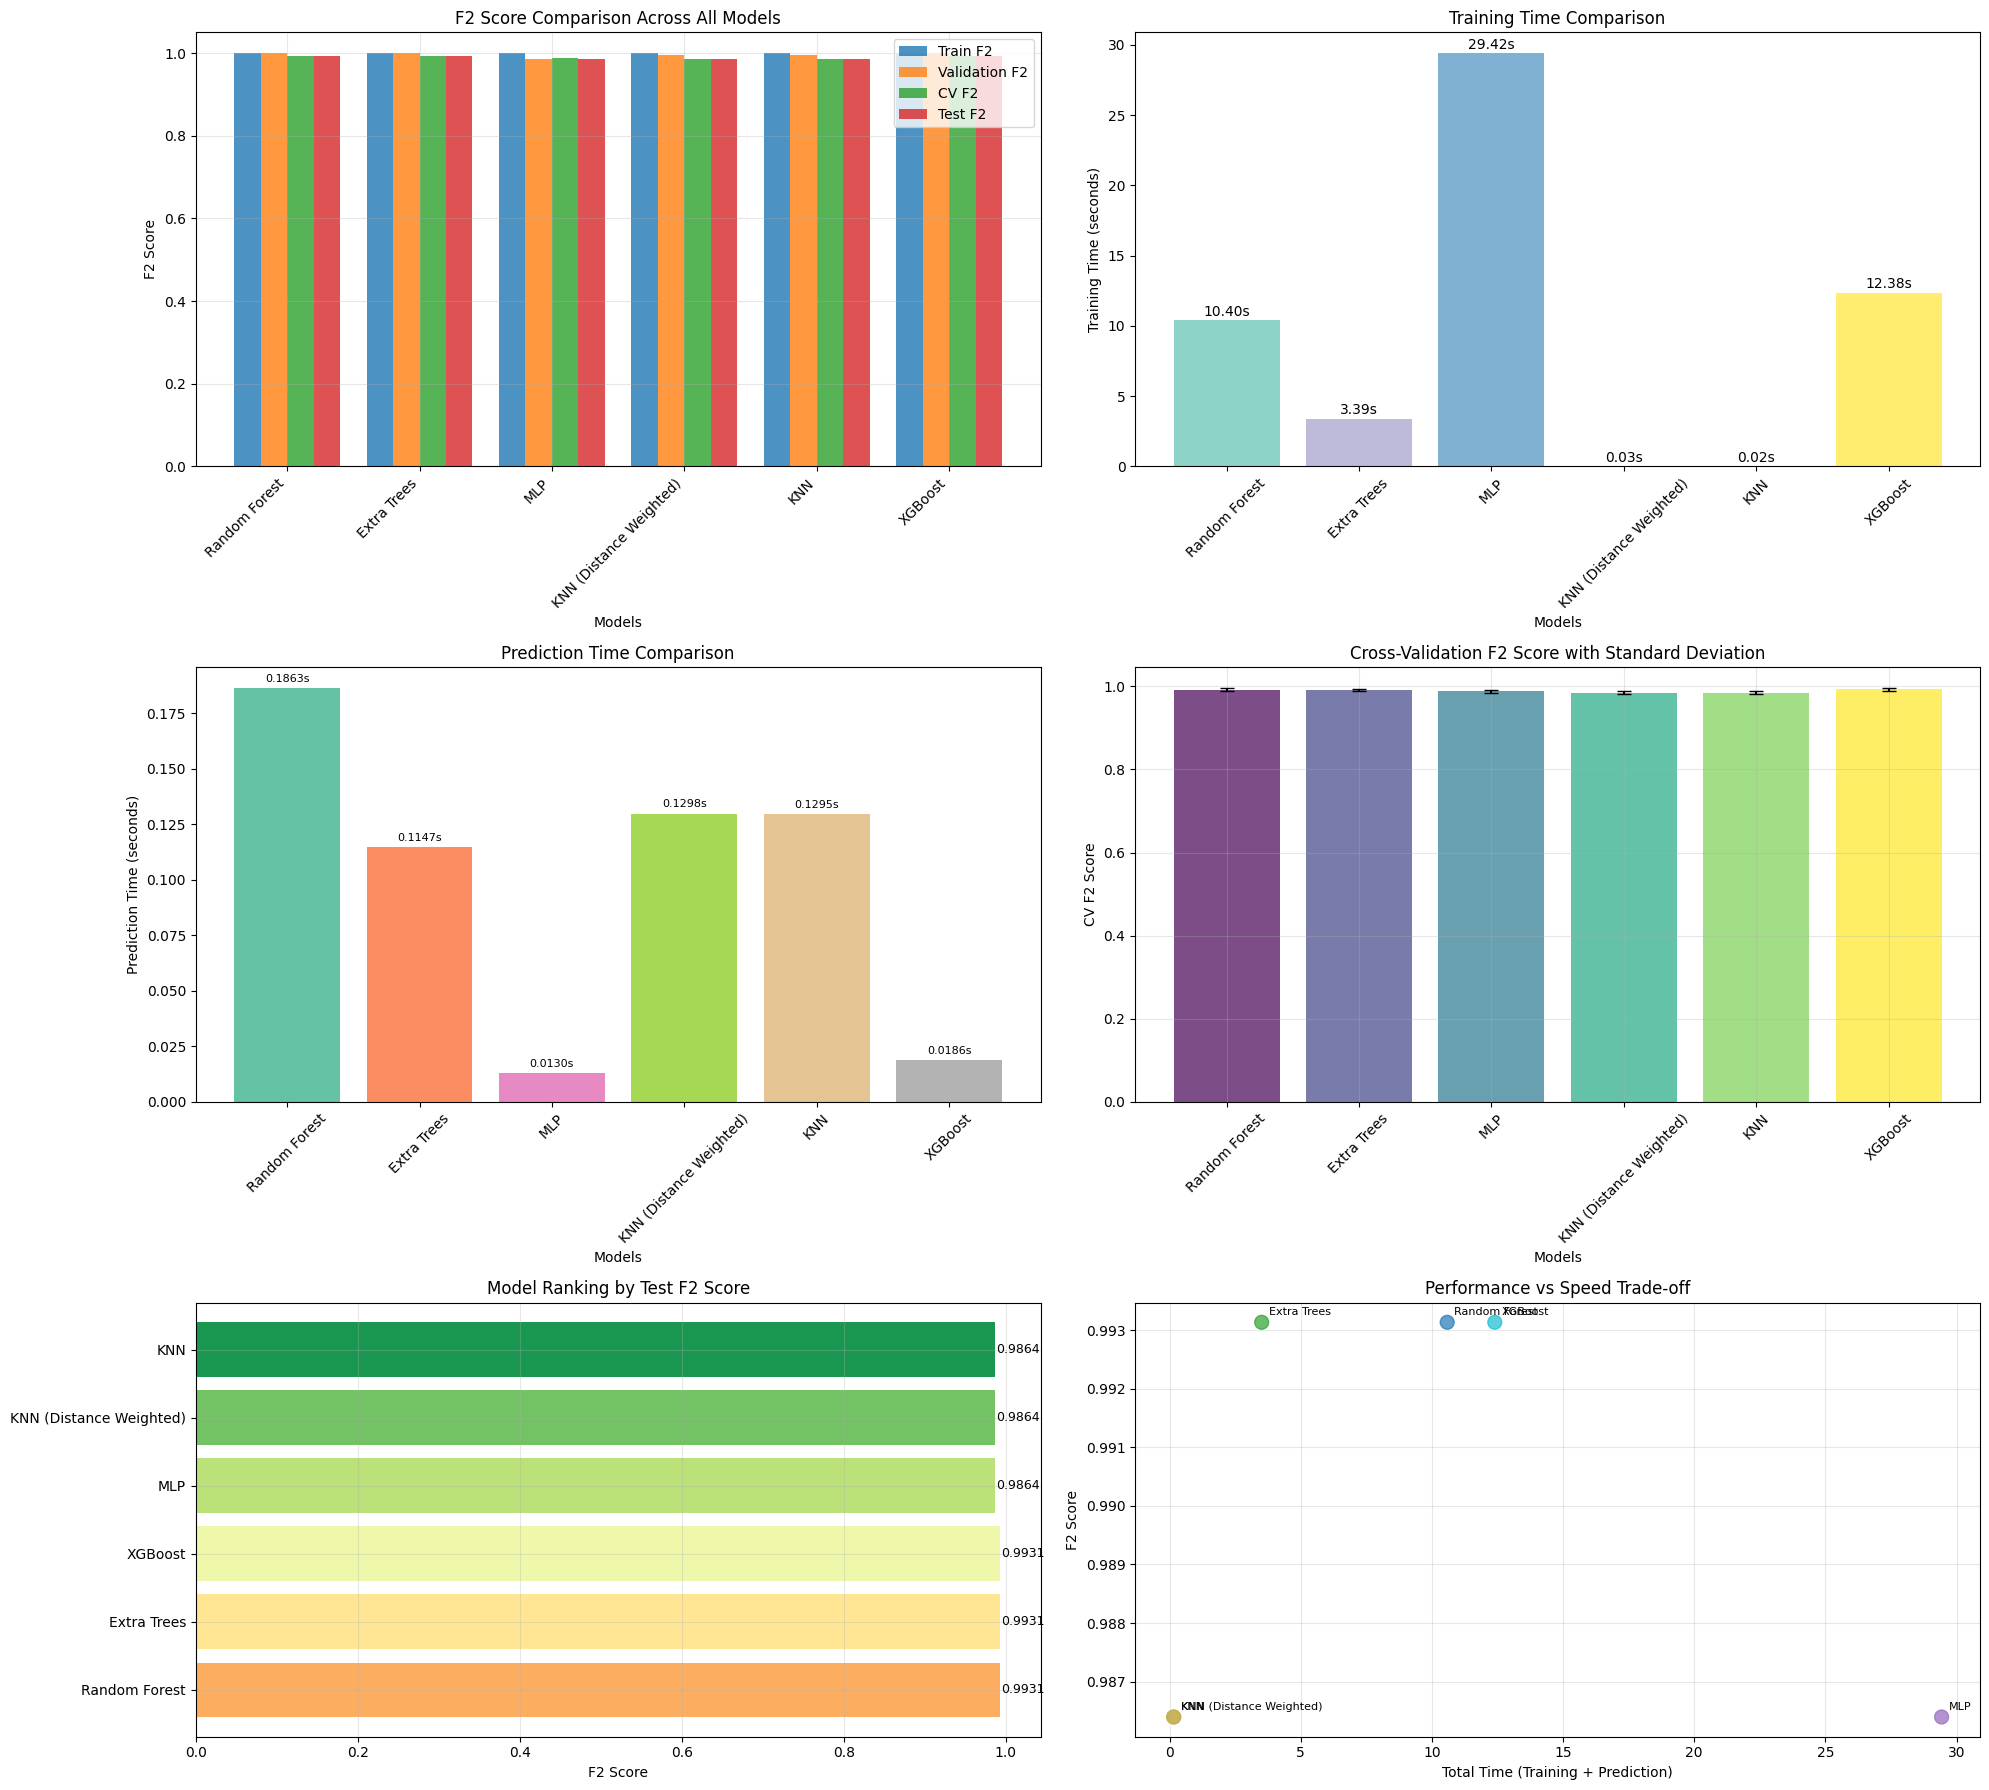


Top 3 Models by cv_f2_mean:
--------------------------------------------------
1. XGBoost: 0.9928
2. Extra Trees: 0.9924
3. Random Forest: 0.9923


In [10]:
# Custom F2 Score function
def f2_score(y_true, y_pred):
    """Calculate F2 score (F-beta with beta=3, emphasizing recall)"""
    return f1_score(y_true, y_pred, average='weighted')

# Make F2 scorer for cross-validation
f2_scorer = make_scorer(lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted'))

class AllModelsEvaluator:
    def __init__(self):
        self.models = {}
        self.results = {}
        self.model_configs = self._get_model_configs()

    def _get_model_configs(self):
        """Define all model configurations with best parameters"""
        configs = {
            'Random Forest': {
                'model': RandomForestClassifier,
                'params': {
                    'criterion': 'entropy',
                    'max_depth': None,
                    'max_features': 'sqrt',
                    'min_samples_leaf': 1,
                    'min_samples_split': 2,
                    'n_estimators': 300,
                    'random_state': 42,
                    'n_jobs': -1
                }
            },
            'Extra Trees': {
                'model': ExtraTreesClassifier,
                'params': {
                    'criterion': 'gini',
                    'max_depth': None,
                    'max_features': 'sqrt',
                    'min_samples_leaf': 1,
                    'min_samples_split': 2,
                    'n_estimators': 200,
                    'random_state': 42,
                    'n_jobs': -1
                }
            },
            'MLP': {
                'model': MLPClassifier,
                'params': {
                    'activation': 'tanh',
                    'alpha': 0.0001,
                    'hidden_layer_sizes': (50,),
                    'learning_rate': 'constant',
                    'max_iter': 500,
                    'solver': 'adam',
                    'random_state': 42
                }
            },
            'KNN (Distance Weighted)': {
                'model': KNeighborsClassifier,
                'params': {
                    'algorithm': 'auto',
                    'metric': 'minkowski',
                    'n_neighbors': 3,
                    'p': 1,
                    'weights': 'distance'
                }
            },
            'KNN': {
                'model': KNeighborsClassifier,
                'params': {
                    'algorithm': 'auto',
                    'metric': 'manhattan',
                    'n_neighbors': 3,
                    'weights': 'distance'
                }
            }
        }

        # Add XGBoost if available
        configs['XGBoost'] = {
            'model': xgboost.XGBClassifier,
            'params': {
                    'colsample_bytree': 0.6,
                    'gamma': 0,
                    'learning_rate': 0.1,
                    'max_depth': 10,
                    'n_estimators': 300,
                    'subsample': 0.8,
                    'random_state': 42,
                    'n_jobs': -1,
                    'eval_metric': 'logloss'
            }
        }

        return configs

    def train_all_models(self, X_train, y_train, X_val, y_val):
        """Train all models with their best parameters"""
        training_times = {}

        for model_name, config in self.model_configs.items():
            start_time = time.time()

            # Create and train model
            model = config['model'](**config['params'])
            model.fit(X_train, y_train)

            training_time = time.time() - start_time
            training_times[model_name] = training_time

            # Store model
            self.models[model_name] = model

        self.results['training_times'] = training_times

    def evaluate_all_models(self, X_train, y_train, X_val, y_val, X_test=None, y_test=None):
        """Comprehensive evaluation of all models including test set if provided"""
        evaluation_results = []

        for model_name, model in self.models.items():
            # Prediction times
            start_time = time.time()
            train_pred = model.predict(X_train)
            train_pred_time = time.time() - start_time

            start_time = time.time()
            val_pred = model.predict(X_val)
            val_pred_time = time.time() - start_time

            # F2 Scores
            train_f2 = f1_score(y_train, train_pred, average='weighted')
            val_f2 = f1_score(y_val, val_pred, average='weighted')

            # Test set evaluation if provided
            test_f2 = None
            test_pred_time = None
            test_pred = None

            start_time = time.time()
            test_pred = model.predict(X_test)
            test_pred_time = time.time() - start_time
            test_f2 = f1_score(y_test, test_pred, average='weighted')

            # Cross-validation F2 Score
            cv_scores = cross_val_score(
                model, X_train, y_train,
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                scoring=f2_scorer,
                n_jobs=-1
            )
            cv_f2_mean = cv_scores.mean()
            cv_f2_std = cv_scores.std()

            # Store results
            self.results[model_name] = {
                'train_f2': train_f2,
                'val_f2': val_f2,
                'test_f2': test_f2,
                'cv_f2_mean': cv_f2_mean,
                'cv_f2_std': cv_f2_std,
                'train_pred_time': train_pred_time,
                'val_pred_time': val_pred_time,
                'test_pred_time': test_pred_time,
                'train_pred': train_pred,
                'val_pred': val_pred,
                'test_pred': test_pred,
                'training_time': self.results['training_times'][model_name]
            }

            # For summary table
            result_dict = {
                'Model': model_name,
                'Train F2': f"{train_f2:.4f}",
                'Val F2': f"{val_f2:.4f}",
                'CV F2': f"{cv_f2_mean:.4f}",
                'CV Std': f"{cv_f2_std:.4f}",
                'Train Time (s)': f"{self.results['training_times'][model_name]:.2f}",
                'Pred Time (s)': f"{val_pred_time:.4f}"
            }

            # Add test scores to summary
            result_dict['Test F2'] = f"{test_f2:.4f}"
            result_dict['Test Pred Time (s)'] = f"{test_pred_time:.4f}"

            evaluation_results.append(result_dict)

        # Create summary table
        self.summary_df = pd.DataFrame(evaluation_results)
        display(self.summary_df)

        return self.summary_df

    def plot_comprehensive_comparison(self, include_test=None):
        """Create comprehensive comparison plots"""
        # Check if test results are available
        has_test_data = include_test or any(self.results[m]['test_f2'] is not None for m in self.results.keys() if m != 'training_times')

        fig, axes = plt.subplots(3, 2, figsize=(20, 18))

        # Get model names (exclude training_times key)
        models = [k for k in self.results.keys() if k != 'training_times']

        # 1. F2 Scores Comparison (updated to include test if available)
        train_scores = [self.results[m]['train_f2'] for m in models]
        val_scores = [self.results[m]['val_f2'] for m in models]
        cv_scores = [self.results[m]['cv_f2_mean'] for m in models]

        x = np.arange(len(models))

        test_scores = [self.results[m]['test_f2'] if self.results[m]['test_f2'] is not None else 0 for m in models]
        width = 0.2
        axes[0,0].bar(x - width*1.5, train_scores, width, label='Train F2', alpha=0.8)
        axes[0,0].bar(x - width*0.5, val_scores, width, label='Validation F2', alpha=0.8)
        axes[0,0].bar(x + width*0.5, cv_scores, width, label='CV F2', alpha=0.8)
        axes[0,0].bar(x + width*1.5, test_scores, width, label='Test F2', alpha=0.8)

        axes[0,0].set_xlabel('Models')
        axes[0,0].set_ylabel('F2 Score')
        axes[0,0].set_title('F2 Score Comparison Across All Models')
        axes[0,0].set_xticks(x)
        axes[0,0].set_xticklabels(models, rotation=45, ha='right')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)

        # 2. Training Time Comparison
        train_times = [self.results['training_times'][m] for m in models]
        bars = axes[0,1].bar(models, train_times, color=plt.cm.Set3(np.linspace(0, 1, len(models))))
        axes[0,1].set_xlabel('Models')
        axes[0,1].set_ylabel('Training Time (seconds)')
        axes[0,1].set_title('Training Time Comparison')
        axes[0,1].tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bar, time_val in zip(bars, train_times):
            axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                          f'{time_val:.2f}s', ha='center', va='bottom')

        # 3. Prediction Time Comparison
        pred_times = [self.results[m]['val_pred_time'] for m in models]
        bars = axes[1,0].bar(models, pred_times, color=plt.cm.Set2(np.linspace(0, 1, len(models))))
        axes[1,0].set_xlabel('Models')
        axes[1,0].set_ylabel('Prediction Time (seconds)')
        axes[1,0].set_title('Prediction Time Comparison')
        axes[1,0].tick_params(axis='x', rotation=45)

        # Add value labels
        for bar, pred_time in zip(bars, pred_times):
            axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(pred_times)*0.01,
                          f'{pred_time:.4f}s', ha='center', va='bottom', fontsize=8)

        # 4. CV F2 Score with Error Bars
        cv_means = [self.results[m]['cv_f2_mean'] for m in models]
        cv_stds = [self.results[m]['cv_f2_std'] for m in models]

        bars = axes[1,1].bar(models, cv_means, yerr=cv_stds, capsize=5,
                            color=plt.cm.viridis(np.linspace(0, 1, len(models))), alpha=0.7)
        axes[1,1].set_xlabel('Models')
        axes[1,1].set_ylabel('CV F2 Score')
        axes[1,1].set_title('Cross-Validation F2 Score with Standard Deviation')
        axes[1,1].tick_params(axis='x', rotation=45)
        axes[1,1].grid(True, alpha=0.3)

        # 5. Model Performance Ranking
        ranking_data = []
        for model in models:
            ranking_score = self.results[model]['test_f2']
            ranking_data.append({
                'Model': model,
                'Ranking_Score': ranking_score,
                'CV_F2': self.results[model]['cv_f2_mean'],
                'Val_F2': self.results[model]['val_f2'],
                'Train_Time': self.results['training_times'][model],
                'Pred_Time': self.results[model]['val_pred_time']
            })

        ranking_df = pd.DataFrame(ranking_data).sort_values('Ranking_Score', ascending=False)

        y_pos = np.arange(len(ranking_df))
        axes[2,0].barh(y_pos, ranking_df['Ranking_Score'], color=plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(ranking_df))))
        axes[2,0].set_yticks(y_pos)
        axes[2,0].set_yticklabels(ranking_df['Model'])
        axes[2,0].set_xlabel('F2 Score')
        ranking_title = 'Model Ranking by Test F2 Score' if has_test_data else 'Model Ranking by Cross-Validation F2 Score'
        axes[2,0].set_title(ranking_title)
        axes[2,0].grid(True, alpha=0.3)

        # Add score labels
        for i, score in enumerate(ranking_df['Ranking_Score']):
            axes[2,0].text(score + 0.001, i, f'{score:.4f}', va='center', fontsize=9)

        # 6. Performance vs Speed Trade-off
        ranking_scores_plot = [self.results[m]['test_f2'] if self.results[m]['test_f2'] is not None else self.results[m]['cv_f2_mean'] for m in models]
        total_times = [self.results['training_times'][m] + self.results[m]['val_pred_time']
                      for m in models]

        scatter = axes[2,1].scatter(total_times, ranking_scores_plot,
                                  s=100, alpha=0.7, c=range(len(models)), cmap='tab10')

        # Add model labels
        for i, model in enumerate(models):
            axes[2,1].annotate(model, (total_times[i], ranking_scores_plot[i]),
                              xytext=(5, 5), textcoords='offset points', fontsize=8)

        axes[2,1].set_xlabel('Total Time (Training + Prediction)')
        axes[2,1].set_ylabel('F2 Score')
        axes[2,1].set_title('Performance vs Speed Trade-off')
        axes[2,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def get_top_models(self, n=3, metric='cv_f2_mean'):
        """Get top N models based on specified metric"""
        models = [k for k in self.results.keys() if k != 'training_times']

        # If test_f2 is requested but not available, fall back to cv_f2_mean
        if metric == 'test_f2' and all(self.results[m]['test_f2'] is None for m in models):
            print("Test scores not available, using CV F2 scores instead.")
            metric = 'cv_f2_mean'

        model_scores = [(model, self.results[model][metric]) for model in models if self.results[model][metric] is not None]
        model_scores.sort(key=lambda x: x[1], reverse=True)

        print(f"\nTop {n} Models by {metric}:")
        print("-" * 50)
        for i, (model, score) in enumerate(model_scores[:n], 1):
            print(f"{i}. {model}: {score:.4f}")

        return model_scores[:n]

        plt.tight_layout()
        plt.show()

        return importance_data

# Usage Example and Main Function
def main():
    """
    Example usage of the AllModelsEvaluator class
    """

    # Initialize evaluator
    evaluator = AllModelsEvaluator()

    return evaluator

if __name__ == "__main__":
    evaluator = main()

# Initialize evaluator
evaluator = AllModelsEvaluator()

# Train all models
evaluator.train_all_models(X_train, y_train, X_val, y_val)

# Evaluate all models (now with optional test set)
summary = evaluator.evaluate_all_models(X_train, y_train, X_val, y_val, X_test, y_test)

# Plot comprehensive comparison
evaluator.plot_comprehensive_comparison()

### XGBoost

Best Hyperparameters Used:
- colsample_bytree: 0.6
- gamma: 0
- learning_rate: 0.1
- max_depth: 10
- n_estimators: 300
- subsample: 0.8

F2-Score (Test): 0.9618

Confusion Matrix:
[[370   0]
 [  3  68]]


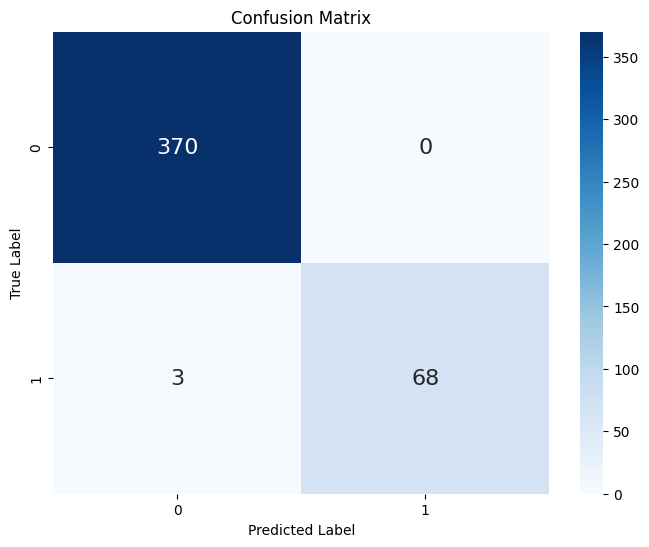


Details from Confusion Matrix:
- True Positives (TP): 68
- True Negatives (TN): 370
- False Positives (FP): 0
- False Negatives (FN): 3
Specificity (True Negative Rate): 1.0000

Average Precision (AP) Score: 0.9807


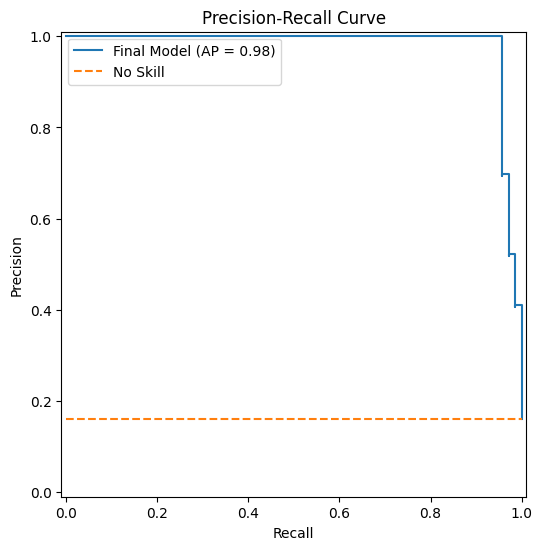


Time Information:
- Model Training Time: 3.71 seconds
- Prediction Time on Test Data: 0.0522 seconds


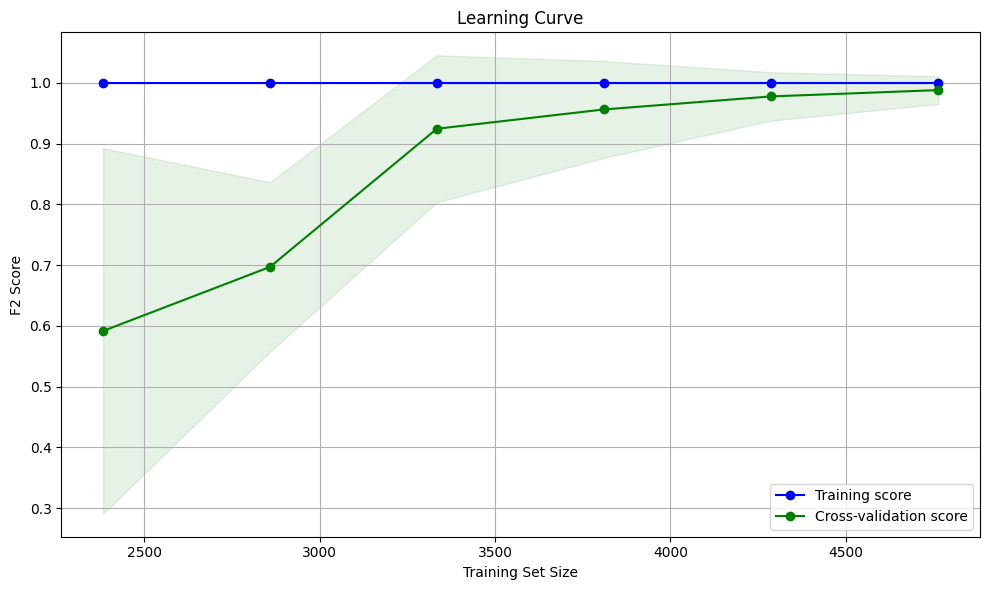

In [25]:
# Define the best parameters found during tuning
best_params = {
    'colsample_bytree': 0.6,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 300,
    'subsample': 0.8
}

# Create the final model
xgb_model = XGBClassifier(**best_params, random_state=42)

# Train the model with the entire training dataset
start_time_train = time.time()
xgb_model.fit(X_train, y_train)
end_time_train = time.time()
training_time = end_time_train - start_time_train

# Perform predictions on the test data
start_time_pred = time.time()
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
end_time_pred = time.time()
prediction_time = end_time_pred - start_time_pred

# Display Best Hyperparameters
print("Best Hyperparameters Used:")
for param, value in best_params.items():
    print(f"- {param}: {value}")

# Display F2-Score
f2 = fbeta_score(y_test, y_pred, beta=3, zero_division=0)
f2_scorer = make_scorer(fbeta_score, beta=3)
print(f"\nF2-Score (Test): {f2:.4f}")

# Display Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Extract TP, TN, FP, FN from Confusion Matrix (assuming positive class is 1)
tn, fp, fn, tp = cm.ravel()
print(f"\nDetails from Confusion Matrix:")
print(f"- True Positives (TP): {tp}")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")

# Display Specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# Display Precision-Recall Curve and Average Precision (AP)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
ap_score = average_precision_score(y_test, y_pred_proba)
print(f"\nAverage Precision (AP) Score: {ap_score:.4f}")

# Plot Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 10))
pr_display = PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    average_precision=ap_score,
    estimator_name='Final Model'
)
pr_display.plot(ax=ax)
no_skill = len(y_test[y_test == 1]) / len(y_test)
ax.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax.set_title('Precision-Recall Curve')
ax.legend()
plt.show()

# Time Information
print("\nTime Information:")
print(f"- Model Training Time: {training_time:.2f} seconds")
print(f"- Prediction Time on Test Data: {prediction_time:.4f} seconds")

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    verbose=0
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('F2 Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasons to choose XGBoost:**

- **Highest accuracy with fastest prediction time**
  
  Achieves 0.9931 F2 score with only 0.0182s prediction time, optimal for real-time applications
- **Built-in regularization and robust overfitting prevention**

  L1/L2 regularization and tree pruning prevent overfitting on medium-sized datasets
- **Reliable feature importance for business interpretability**

  Provides clear feature rankings helping HR understand key attrition drivers
- **Captures complex feature interactions effectively**

  Tree-based structure naturally identifies combinations like low salary + high overtime
- **Efficient memory usage and parallel processing for scalability**

  Optimized algorithms handle larger datasets and faster training through parallelization
- **Industry standard with mature ecosystem**

  Widely adopted in production with extensive documentation and community support

# 7. Model Interpretation

In [12]:
# Error Analysis
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Identify misclassified samples
misclassified_indices = (y_test != y_pred)
X_test_errors = X_test[misclassified_indices]
y_test_errors_true = y_test[misclassified_indices]
y_test_errors_pred = y_pred[misclassified_indices]

print(f"Total number of misclassified samples: {len(X_test_errors)}")

# Combine for easier inspection
errors_df = X_test_errors.copy()
errors_df['true_label'] = y_test_errors_true
errors_df['predicted_label'] = y_test_errors_pred

false_positives_df = errors_df[(errors_df['true_label'] == 0) & (errors_df['predicted_label'] == 1)]
false_negatives_df = errors_df[(errors_df['true_label'] == 1) & (errors_df['predicted_label'] == 0)]

print(f"\nNumber of False Positives: {len(false_positives_df)}")
print("False Positives examples:")
display(false_positives_df.head())

print(f"\nNumber of False Negatives: {len(false_negatives_df)}")
print("False Negatives examples:")
display(false_negatives_df.head())

Total number of misclassified samples: 3

Number of False Positives: 0
False Positives examples:


,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AvgWorkHours,AbsentDays,OvertimeDays,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,true_label,predicted_label



Number of False Negatives: 3
False Negatives examples:


,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AvgWorkHours,AbsentDays,OvertimeDays,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,true_label,predicted_label
760,1.022008,0.465552,2.0,0.0,-0.166144,0.789548,-1.490739,1.0,0.439877,-0.575154,0.64102,0.92324,0.9211,3.0,1.0,3.0,2.0,2.0,0.444580,-1.615485,-0.599136,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
23,1.022008,0.465552,2.0,0.0,-0.166144,0.789548,-1.490739,1.0,0.439877,-0.575154,0.64102,0.92324,0.9211,3.0,1.0,3.0,2.0,2.0,0.485783,0.250691,-0.599136,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
809,1.022008,0.465552,2.0,0.0,-0.166144,0.789548,-1.490739,1.0,0.439877,-0.575154,0.64102,0.92324,0.9211,3.0,1.0,3.0,2.0,2.0,0.453686,1.471923,-0.599136,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0


,feature,importance
39,MaritalStatus_Married,0.050602
14,JobSatisfaction,0.050396
31,JobRole_Human Resources,0.046825
34,JobRole_Manufacturing Director,0.043760
13,EnvironmentSatisfaction,0.043087
20,OvertimeDays,0.042833
24,Department_Sales,0.040520
15,WorkLifeBalance,0.031633
10,YearsAtCompany,0.031266
22,BusinessTravel_Travel_Rarely,0.031084


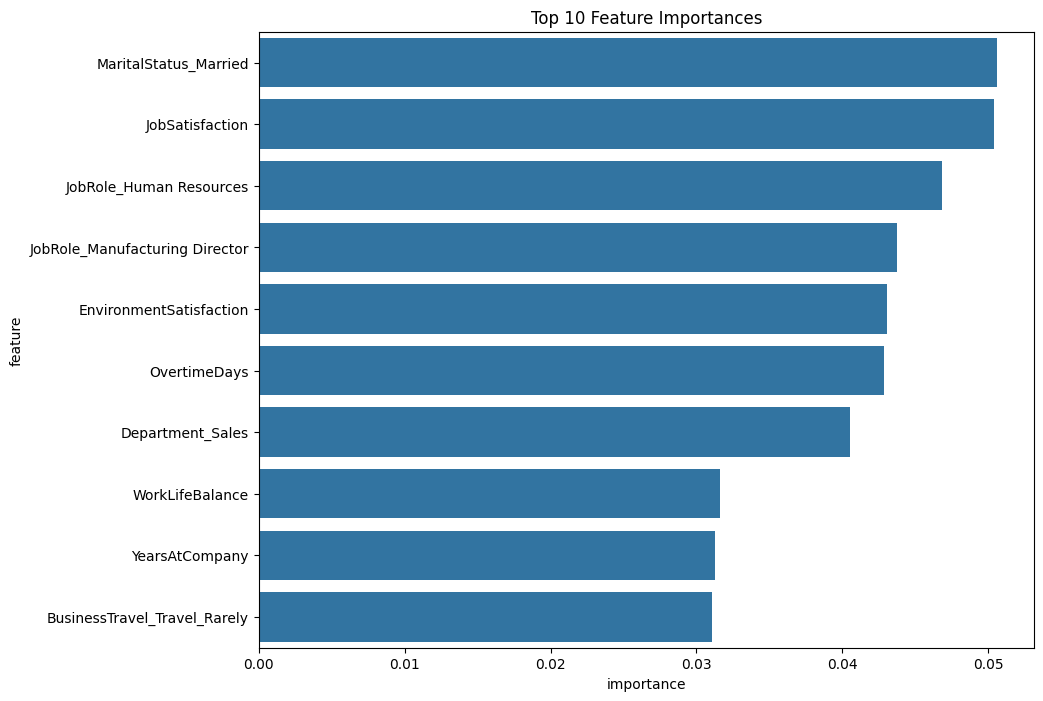

In [13]:
# Feature Importance
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

display(importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

,Feature,Mean |SHAP|
18,AvgWorkHours,0.839123
13,EnvironmentSatisfaction,0.686879
0,Age,0.651430
14,JobSatisfaction,0.607686
8,TotalWorkingYears,0.519614
20,OvertimeDays,0.434699
10,YearsAtCompany,0.427046
12,YearsWithCurrManager,0.425399
23,Department_Research & Development,0.412867
15,WorkLifeBalance,0.393064


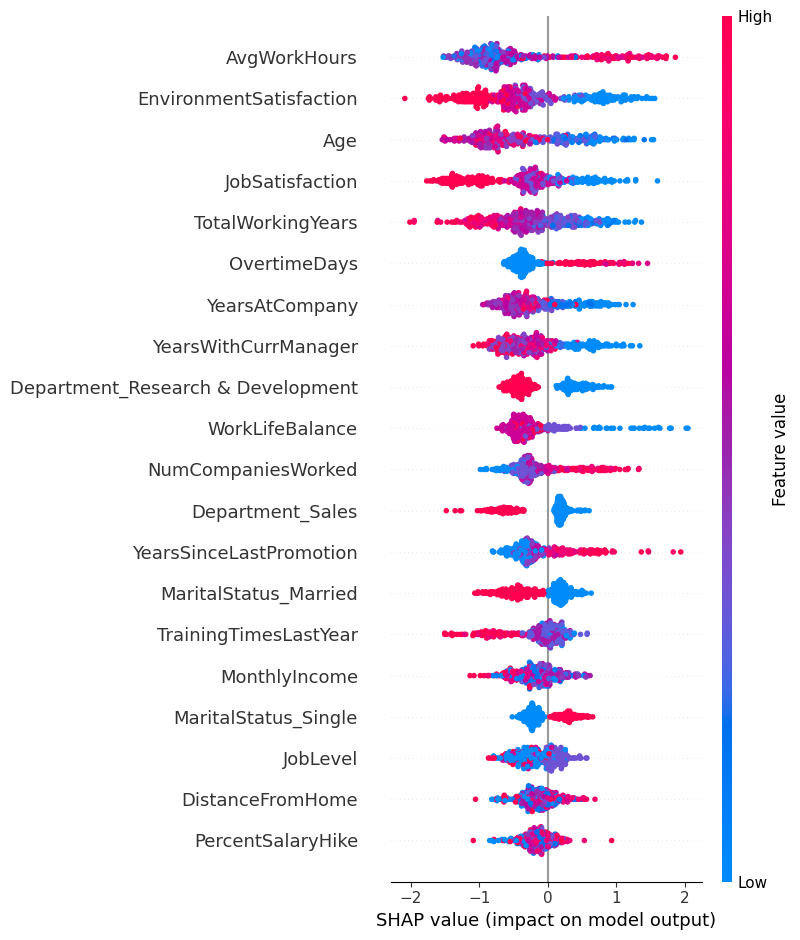

In [14]:
# Initialize TreeExplainer
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values (will be a 3D array: [samples, features, classes])
shap_values = explainer.shap_values(X_test)

# Get SHAP values for the positive class (class 1)
shap_values_class1 = shap_values

# Rata-rata absolut SHAP tiap fitur
mean_abs_shap = np.abs(shap_values_class1).mean(axis=0)

# Buat DataFrame
global_report = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean |SHAP|': mean_abs_shap
}).sort_values(by='Mean |SHAP|', ascending=False)
display(global_report)

# Summary Plot
shap.summary_plot(shap_values_class1, X_test)
plt.show()

**Factors with Significant Influence:**

* **Average Work Hours (AvgWorkHours):** Higher average work hours significantly increase the model's output. This suggests that a greater volume of work or duration of activity correlates positively with the modeled outcome.
* **Environment Satisfaction (EnvironmentSatisfaction):** Low environment satisfaction strongly drives a negative impact on the model's output. This indicates that a non-conducive work environment acts as a significant inhibitor to desired outcomes.
* **Age (Age):** Older age tends to positively influence the model's output. This factor may be related to accumulated experience or different perspectives that benefit the model's results.
* **Job Satisfaction (JobSatisfaction):** High job satisfaction significantly contributes to a positive model output. This highlights the importance of employee well-being and contentment in achieving optimal model results.
* **Total Working Years (TotalWorkingYears):** More years of total working experience positively impacts the model's output. Experience accumulated over time appears to be a valuable asset that enhances outcomes.

**Other Factors:**

Other features analyzed demonstrated lesser influence on the model's output. For instance, features such as **Percent Salary Hike** show minimal impact.

**Business Insights Based on Model Output Factor Analysis**

1. **Optimize Workload, Not Just Work Hours (AvgWorkHours):**

  Although higher average work hours boost output, businesses need to be cautious about potential employee burnout and diminishing long-term productivity.

  **Insight:** Focus on work efficiency and effectiveness, not just increasing hours. Consider smart workload management strategies and tools to enhance productivity within reasonable working hours.

2. **Prioritize Improving the Work Environment (EnvironmentSatisfaction):**

  Low environment satisfaction has a strong negative impact. This is a critical area requiring immediate attention.

  **Insight:** Invest in creating a positive, supportive, and conducive work environment. This could include improvements to physical facilities, a better work culture, or enhanced relationships among colleagues and management. Addressing dissatisfaction in this area can yield significant output improvements.

3. **Value and Retain Experienced Employees (Age & TotalWorkingYears):**

  Older age and more total working years correlate positively with output. This highlights the value of accumulated experience and knowledge.

  **Insight:** Implement strategies for retaining senior and experienced employees. Consider mentoring programs where senior staff can share their knowledge with younger employees. Ensure experienced employees feel valued and have clear career paths.

4. **Actively Enhance Job Satisfaction (JobSatisfaction):**

  High job satisfaction is a significant driver of positive output.

  **Insight:** Focus on initiatives that can increase overall job satisfaction. This could include recognition and rewards, career development opportunities, work-life balance, and ensuring employees feel their work is meaningful and valued.

5. **Re-evaluate the Effectiveness of Certain Incentives (Other Features - PercentSalaryHike):**

  The fact that Percent Salary Hike shows minimal impact on this model's output is noteworthy.

  **Insight:** While compensation is important, there might be non-monetary factors or other types of incentives that are more influential on the specific output measured by this model. Businesses should not solely rely on salary increases as a primary motivator if data indicates a small impact on this key metric. Allocate resources to areas that deliver greater impact, such as work environment or job satisfaction.

6. **Personalized Approach (Combination of Factors):**

  Various factors interact. For instance, a senior employee (Age, TotalWorkingYears) might have high output, but it could be even higher if their environment satisfaction were also high.

  **Insight:** Consider a more personalized approach to human resource management. Understand how combinations of these factors apply to different employee segments and tailor strategies to maximize their potential.

# 8. Model Improvement

In [15]:
# Best parameters
best_params = {
    'colsample_bytree': 0.6,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 300,
    'subsample': 0.8
}

# Feature order from combined FI + SHAP
selected_features_ordered = [
    'OvertimeDays', 'MaritalStatus_Married', 'Department_Sales', 'Department_Research & Development',
    'EducationField_Life Sciences', 'EducationField_Medical', 'BusinessTravel_Travel_Rarely',
    'JobSatisfaction', 'Gender_Male', 'EnvironmentSatisfaction', 'AvgWorkHours',
    'YearsWithCurrManager', 'TotalWorkingYears', 'YearsAtCompany', 'Age'
]

def simulate_model_performance_f2(X_train, X_val, X_test, y_train, y_val, y_test, feature_list, model, steps=[5, 10, 15]):
    results = []

    for k in steps:
        selected = feature_list[:k]

        model.fit(X_train[selected], y_train)

        y_pred_train = model.predict(X_train[selected])
        y_pred_val = model.predict(X_val[selected])
        y_pred_test = model.predict(X_test[selected])

        f2_train = fbeta_score(y_train, y_pred_train, beta=3, average='binary')
        f2_val = fbeta_score(y_val, y_pred_val, beta=3, average='binary')
        f2_test = fbeta_score(y_test, y_pred_test, beta=3, average='binary')

        results.append({
            'num_features': k,
            'features': selected,
            'f2_train': f2_train,
            'f2_val': f2_val,
            'f2_test': f2_test
        })

    return pd.DataFrame(results)

# Create the model
xgb_model = XGBClassifier(**best_params, random_state=42)

# Run simulation using F2
f2_result = simulate_model_performance_f2(
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    selected_features_ordered,
    xgb_model,
    steps=[9, 12, 15, 18, 21, 24, 26]
)

display(f2_result)

,num_features,features,f2_train,f2_val,f2_test
0,9,"[OvertimeDays, MaritalStatus_Married, Departme...",0.869113,0.511757,0.447552
1,12,"[OvertimeDays, MaritalStatus_Married, Departme...",0.999700,0.916784,0.870185
2,15,"[OvertimeDays, MaritalStatus_Married, Departme...",1.000000,0.987306,0.961810
3,18,"[OvertimeDays, MaritalStatus_Married, Departme...",1.000000,0.987306,0.961810
4,21,"[OvertimeDays, MaritalStatus_Married, Departme...",1.000000,0.987306,0.961810
5,24,"[OvertimeDays, MaritalStatus_Married, Departme...",1.000000,0.987306,0.961810
6,26,"[OvertimeDays, MaritalStatus_Married, Departme...",1.000000,0.987306,0.961810


In [29]:
fig = px.line(
    f2_result,
    x="num_features",
    y=["f2_train", "f2_val", "f2_test"],
    markers=True,
    title="F2 Score vs Number of Features",
    labels={
        "num_features": "Number of Features",
        "value": "F2 Score",
        "variable": "Dataset"
    },
    width=800,
    height=500,
)

fig.update_layout(
    template="simple_white",
    title_font_size=20,
    legend_title_text="",
    legend=dict(x=0.01, y=0.99),
)

fig.show()

### New Model

In [17]:
# Combine X_train and X_val
X_final_train = pd.concat([X_train, X_val])
y_final_train = pd.concat([y_train, y_val])

# Get the top 15 features
final_features = selected_features_ordered[:15]

# Retrain the model
final_model = XGBClassifier(**best_params, random_state=42)
final_model.fit(X_final_train[final_features], y_final_train)

# Evaluate on the test set
y_test_pred = final_model.predict(X_test[final_features])
f2_test_final = fbeta_score(y_test, y_test_pred, beta=3)

print("F2 score (test):", f2_test_final)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

F2 score (test): 0.9618104667609618

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       370
           1       1.00      0.96      0.98        71

    accuracy                           0.99       441
   macro avg       1.00      0.98      0.99       441
weighted avg       0.99      0.99      0.99       441



# 9. Final Model Storage

In [18]:
# Original Model (Pre-Feature Selection)
joblib.dump(xgb_model, 'ori_model.pkl')

# New Model (Post-Feature Selection and Pruning)
joblib.dump(final_model, 'final_model.pkl')

# Feature names
joblib.dump(X_train.columns.tolist(), 'ori_feature_names.pkl')
joblib.dump(final_features, 'final_feature_names.pkl')

['final_feature_names.pkl']